## Neural Networks
### Hand-in: Study CIFAR classification with CNNs and data augmentation in tensorflow or pytorch in-depth

The goal of this exercise is to explore the power of systematic data augmentation to train you in more systematically analysing your ML approach.

We will look again into the more advanced task for image classification with CNNs: classifying on CIFAR10. But now, we want to include the monitoring and analysis options that are sensible to apply. If you already looked into this yesterday, then: good job! You made today's tasks much easier. Yet

For the hand-in, go through the following tasks and answer the following questions.

Tasks:
1. Take your notebook from Wednesday's exercise as a starting point for this hand-in (copy+paste all your working code for data loading, model building + training, and analysis).
2. Add some systematic data augmentation as a pre-processing step!
3. Add k-fold cross-validation (e.g. k=5)!
4. Add particular training monitor plots: plot loss and accuracy over the training steps and reproduce some of yesterday's as well as add more hyperparameter exploration.
5. Try out some regularization: e.g. with adding a Normalization layer or Dropout layer [1], or (manually or trough the optimizer) add L1 or L2 regularization to your model [2].
6. Add particular analysis steps: show a confusion matrix over all classes, plot a histogram of predictions for the classes, and plot some of the correctly vs. incorrectly classified images.

Questions:
1. Did data augmentation improve your model? Which augmentation methods were most useful (thus, you might systematically turn individual ones on/off, but DON'T put too much time into that).
2. Did you observe that cross-validation helps for better results?
3. Did you observe that a particular regularization helps for better results?
4. Recapitulate: Are there classes that are difficult to classify correctly? Is this still the case with augmentation?
5. Can you identify particular images that fail to classify consistently? Speculate: why?

[1] https://pytorch.org/docs/stable/nn.html

[2] Good starting point: https://github.com/christianversloot/machine-learning-articles/blob/main/how-to-use-l1-l2-and-elastic-net-regularization-with-pytorch.md

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

#### Load CIFAR-10 from tensorflow or pytorch

In [2]:
batch_size = 32

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainvalset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainvalloader = torch.utils.data.DataLoader(trainvalset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=1,
                                         shuffle=False, num_workers=2)

100%|██████████| 170M/170M [03:41<00:00, 771kB/s]  


##### Preprocessing: Data Augmentation
Add some data augmentation steps here!

In [ ]:
# prompt: add some data augmentation steps here

import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
# ## Neural Networks
# ### Hand-in: Study CIFAR classification with CNNs and data augmentation in tensorflow or pytorch in-depth
#
# The goal of this exercise is to explore the power of systematic data augmentation to train you in more systematically analysing your ML approach.
#
# We will look again into the more advanced task for image classification with CNNs: classifying on CIFAR10. But now, we want to include the monitoring and analysis options that are sensible to apply. If you already looked into this yesterday, then: good job! You made today's tasks much easier. Yet
#
# For the hand-in, go through the following tasks and answer the following questions.
#
# Tasks:
# 1. Take your notebook from Wednesday's exercise as a starting point for this hand-in (copy+paste all your working code for data loading, model building + training, and analysis).
# 2. Add some systematic data augmentation as a pre-processing step!
# 3. Add k-fold cross-validation (e.g. k=5)!
# 4. Add particular training monitor plots: plot loss and accuracy over the training steps and reproduce some of yesterday's as well as add more hyperparameter exploration.
# 5. Try out some regularization: e.g. with adding a Normalization layer or Dropout layer [1], or (manually or trough the optimizer) add L1 or L2 regularization to your model [2].
# 6. Add particular analysis steps: show a confusion matrix over all classes, plot a histogram of predictions for the classes, and plot some of the correctly vs. incorrectly classified images.
#
# Questions:
# 1. Did data augmentation improve your model? Which augmentation methods were most useful (thus, you might systematically turn individual ones on/off, but DON'T put too much time into that).
# 2. Did you observe that cross-validation helps for better results?
# 3. Did you observe that a particular regularization helps for better results?
# 4. Recapitulate: Are there classes that are difficult to classify correctly? Is this still the case with augmentation?
# 5. Can you identify particular images that fail to classify consistently? Speculate: why?
#
# [1] https://pytorch.org/docs/stable/nn.html
#
# [2] Good starting point: https://github.com/christianversloot/machine-learning-articles/blob/main/how-to-use-l1-l2-and-elastic-net-regularization-with-pytorch.md
# #### Load CIFAR-10 from tensorflow or pytorch
batch_size = 32
transform_train = transforms.Compose(
    [transforms.RandomCrop(32, padding=4),
     transforms.RandomHorizontalFlip(),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

transform_test = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainvalset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_train)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform_test)

testloader = torch.utils.data.DataLoader(testset, batch_size=1,
                                         shuffle=False, num_workers=2)
# ##### Preprocessing: Data Augmentation
# Add some data augmentation steps here!


##### Data Splitting
Here we would do some advanced splitting like n-fold cross-validation! The code stub just gives you a head start...

In [ ]:
# as an alternative you can further split the training data to obtain a validation set:

size_trainset = len(trainvalset)
split_trainval = [.8, .2]

g = torch.Generator()
g.manual_seed(1)  # use different random seeds here! e.g. numbers 0 to k

# for a k-fold crossvalidation, you need to make sure to split systematically
# so read up on https://pytorch.org/docs/stable/data.html#single-and-multi-process-data-loading and consider e.g. SubsetRandomSampler
trainset, valset = torch.utils.data.random_split(trainvalset, [int(size_trainset*split_trainval[0]), int(size_trainset*split_trainval[1])])


trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
valloader = torch.utils.data.DataLoader(valset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

print(len(trainset))
print(len(valset))
print(len(testset))

40000
10000
10000


In [ ]:

class KFold:
    
    def __init__(self, dataset, number_of_folds):
        self.dataset = dataset
        self.dataset_length = len(dataset)
        self.number_of_folds = number_of_folds

        dataset_length = len(dataset)
        g = torch.Generator()
        g.manual_seed(1)  # use different random seeds here! e.g. numbers 0 to k

        indicies = torch.arange(dataset_length)
        indicies = indicies[torch.randperm(dataset_length, generator=g)]

        print(indicies)

        fold_sizes = [dataset_length // self.number_of_folds] * self.number_of_folds
        for i in range(dataset_length % number_of_folds):
            fold_sizes[i] += 1

def generate_k_fold(dataset, num_of_folds):
    """_summary_
    Generates k folds that will be split into iterations of training and validation sets. Data is being randomized before splitting to k-folds.
    """



generate_k_fold(trainvalset, 5)


tensor([45845, 11799, 43880,  ..., 37038,  8785,  8475])


##### Show some data characteristics

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].


This shows the next batch of images in the training set


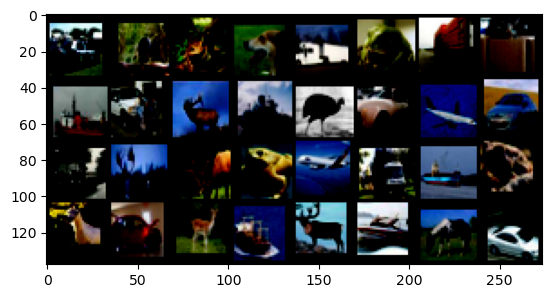

In [6]:
NO_images = batch_size

def imshow(img):
    #img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(trainloader)
images = []
imagebatch, label = next(dataiter)

for i in range(NO_images):
    # draw some random images from the training set according to the dataloader
    image = torch.squeeze(imagebatch[i], 0)
    images.append(image)

images = torch.stack(images).cpu()

# print images
print("This shows the next batch of images in the training set")
imshow(torchvision.utils.make_grid(images))

#### Build the model
Try out regularization as layers or optimiser characteristic.

In [7]:
class SimpleConvNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
        nn.Conv2d(3,10,kernel_size=3),
        nn.ReLU(),
        nn.Flatten(),
        nn.Linear(30 * 30 * 10, 50),
        nn.ReLU(),
        nn.Flatten(),
        nn.Linear(50, 20),
        nn.ReLU(),
        nn.Linear(20, 10)
    )

  def forward(self, x):
    return self.layers(x)

#### Train the model

In [ ]:
# prompt: write training loop for this model

# #### Train the model
# Try out regularization as layers or optimiser characteristic.


# Initialize the model, loss function, and optimizer
model = SimpleConvNet()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

train_loss = []
validation_loss = []

# Training loop
num_epochs = 10
running_loss = 0.0
for epoch in range(num_epochs):

  model.train()
  for i, data in enumerate(trainloader, 0):
    inputs, labels = data

    # Zero the parameter gradients
    optimizer.zero_grad()

    # Forward pass, backward pass, and optimization
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()

  model.eval()
  epoch_validation_loss = 0
  for i, data in enumerate(trainloader, 0):
    inputs, labels = data

    # Forward pass, backward pass, and optimization
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    epoch_validation_loss += loss.item()


  train_loss.append(running_loss)
  validation_loss.append(validation_loss)
  # Print statistics
  print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 1200))

print('Finished Training')


[1,   200] loss: 2.054
[1,   400] loss: 1.824
[1,   600] loss: 1.741
[1,   800] loss: 1.632
[1,  1000] loss: 1.615
[1,  1200] loss: 1.587
[2,   200] loss: 1.569
[2,   400] loss: 1.513
[2,   600] loss: 1.519
[2,   800] loss: 1.522
[2,  1000] loss: 1.497
[2,  1200] loss: 1.484
[3,   200] loss: 1.489
[3,   400] loss: 1.464
[3,   600] loss: 1.471
[3,   800] loss: 1.456
[3,  1000] loss: 1.457
[3,  1200] loss: 1.433
[4,   200] loss: 1.449
[4,   400] loss: 1.434
[4,   600] loss: 1.418
[4,   800] loss: 1.439
[4,  1000] loss: 1.402
[4,  1200] loss: 1.392
[5,   200] loss: 1.406
[5,   400] loss: 1.399
[5,   600] loss: 1.400
[5,   800] loss: 1.396
[5,  1000] loss: 1.420
[5,  1200] loss: 1.395
[6,   200] loss: 1.394
[6,   400] loss: 1.372
[6,   600] loss: 1.364
[6,   800] loss: 1.393
[6,  1000] loss: 1.359
[6,  1200] loss: 1.387
[7,   200] loss: 1.371
[7,   400] loss: 1.377
[7,   600] loss: 1.365
[7,   800] loss: 1.366
[7,  1000] loss: 1.373
[7,  1200] loss: 1.343
[8,   200] loss: 1.360
[8,   400] 

##### Training loop

##### Analyse some training progress
Add plots for loss/accuracy here!

#### Analyse the model
Add: confusion matrix, histogram over classes, plot individual images.
Bonus: use the TSNE sample code for CIFAR10 as well. Does this help your insight?